In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2 indep random var's diff has larger var and negative cov to each

In [52]:
s1 = pd.Series(
    np.random.randn(50), 
    index=pd.date_range('1/1/2000', periods=50)
)
s2 = pd.Series(
    np.random.randn(50),
    index=pd.date_range('1/1/2000', periods=50)
)

df = pd.DataFrame({'s1': s1, 's2': s2})

df["diff"] = df["s1"] - df["s2"]

print(f"{df.shape}")
df.head(1)

(50, 3)


,s1,s2,diff
2000-01-01,0.181497,1.657318,-1.475821


<Figure size 640x480 with 0 Axes>

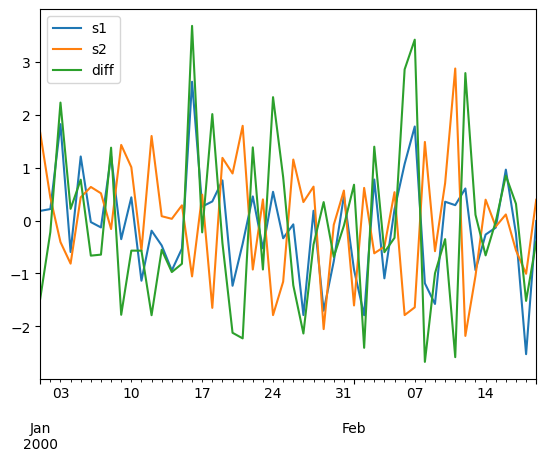

In [53]:
plt.figure()
df.plot()
plt.show()

In [54]:
df.cov()

,s1,s2,diff
s1,1.007037,-0.068890,1.075926
s2,-0.068890,1.235955,-1.304845
diff,1.075926,-1.304845,2.380772


In [55]:
df["s1"].var()

1.0070365162481851

In [56]:
df["s2"].var()

1.2359553577176094

In [57]:
df["diff"].var()

2.3807717408486044

In [58]:
df[["s2", "diff"]].cov().iloc[0, 1]

-1.3048452911590138

### test 2

In [558]:
s2 = pd.Series(
    np.random.normal(0, 1, 50),
    index=pd.date_range('1/1/2000', periods=50)
)
s1 = s2 + np.random.normal(0, 1, 50)

df = pd.DataFrame({'s1': s1, 's2': s2})

df["diff"] = df["s1"] - df["s2"]

print(f"{df.shape}")
df.head(1)

(50, 3)


,s1,s2,diff
2000-01-01,-2.09616,-0.696717,-1.399443


<Figure size 640x480 with 0 Axes>

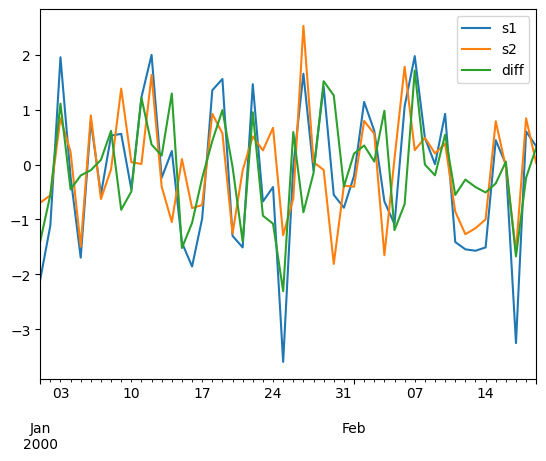

In [559]:
plt.figure()
df.plot()
plt.show()

In [560]:
df.cov()

,s1,s2,diff
s1,1.717017,0.911389,0.805628
s2,0.911389,0.883211,0.028178
diff,0.805628,0.028178,0.777450


In [561]:
#simulate these many times
n = 100
res_list = []

for i in range(n):
    s2 = pd.Series(
        np.random.normal(0, 1, 50), 
        index=pd.date_range('1/1/2000', periods=50)
    )
    s1 = s2 + np.random.normal(0, 0.3, 50)

    df = pd.DataFrame({'s1': s1, 's2': s2})

    df["diff"] = df["s1"] - df["s2"]

    res_list += [
        df["s1"].var(),
        df["s2"].var(),
        df["diff"].var(),
        df[["s2", "diff"]].cov().iloc[0, 1],
    ]

res_df = pd.DataFrame(
    np.array(res_list).reshape(n, 4),
    columns=["s1_var", "s2_var", "diff_var", "cov"]
)

res_df.describe()

,s1_var,s2_var,diff_var,cov
count,100.000000,100.000000,100.000000,100.000000
mean,1.166445,1.054132,0.090769,0.010772
std,0.218787,0.193148,0.018164,0.050382
min,0.680639,0.643424,0.046965,-0.109699
25%,1.046565,0.922973,0.078541,-0.012145
50%,1.167603,1.043368,0.087367,0.008713
75%,1.304682,1.153086,0.101362,0.041446
max,1.744794,1.622070,0.167637,0.150680


array([[<Axes: title={'center': 's1_var'}>,
        <Axes: title={'center': 's2_var'}>],
       [<Axes: title={'center': 'diff_var'}>,
        <Axes: title={'center': 'cov'}>]], dtype=object)

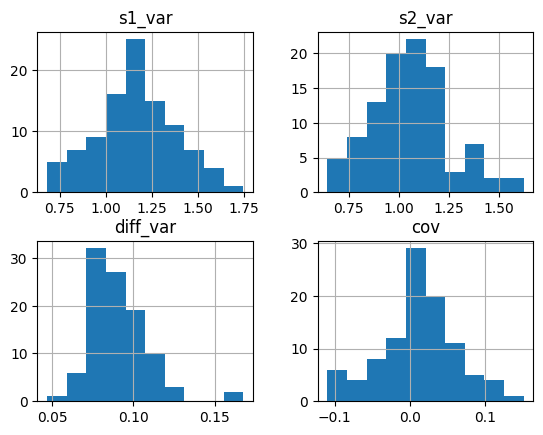

In [562]:
res_df.hist()